In [1]:
import lightkurve as lk
%matplotlib inline
import starry
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import pymc3 as pm
import pymc3_ext as pmx
import theano.tensor as tt
import exoplanet as xo

In [2]:
print(pm.__version__)

3.11.1


In [14]:
tpf = lk.search_targetpixelfile("HAT-P-11", author="Kepler", cadence="long").download_all()

In [15]:
tpf

TargetPixelFileCollection of 15 objects:
    0: KeplerTargetPixelFile Object (ID: 10748390)
    1: KeplerTargetPixelFile Object (ID: 10748390)
    2: KeplerTargetPixelFile Object (ID: 10748390)
    3: KeplerTargetPixelFile Object (ID: 10748390)
    4: KeplerTargetPixelFile Object (ID: 10748390)
    5: KeplerTargetPixelFile Object (ID: 10748390)
    6: KeplerTargetPixelFile Object (ID: 10748390)
    7: KeplerTargetPixelFile Object (ID: 10748390)
    8: KeplerTargetPixelFile Object (ID: 10748390)
    9: KeplerTargetPixelFile Object (ID: 10748390)
    10: KeplerTargetPixelFile Object (ID: 10748390)
    11: KeplerTargetPixelFile Object (ID: 10748390)
    12: KeplerTargetPixelFile Object (ID: 10748390)
    13: KeplerTargetPixelFile Object (ID: 10748390)
    14: KeplerTargetPixelFile Object (ID: 10748390)

In [16]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

TypeError: TargetPixelFileCollection.plot() got an unexpected keyword argument 'frame'

In [ ]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

AttributeError: 'SearchResult' object has no attribute 'to_lightcurve'

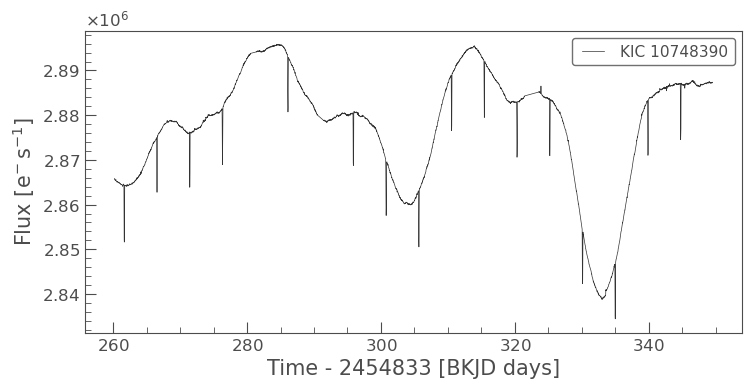

In [ ]:
lc.plot();

In [ ]:
flat, trend = lc.flatten(window_length=300, return_trend=True)

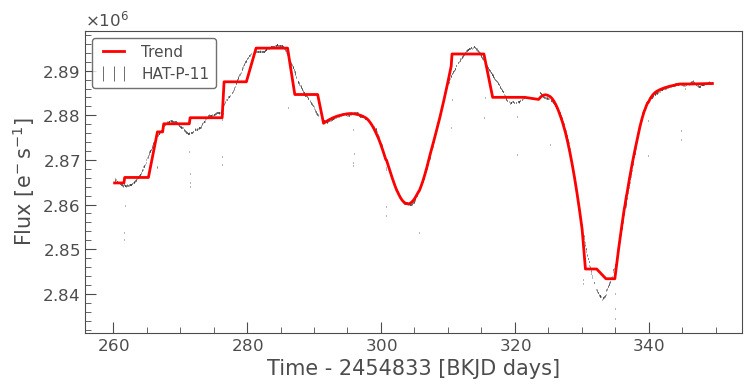

In [ ]:
ax = lc.errorbar(label="HAT-P-11")                 
trend.plot(ax=ax, color='red', lw=2, label='Trend'); 

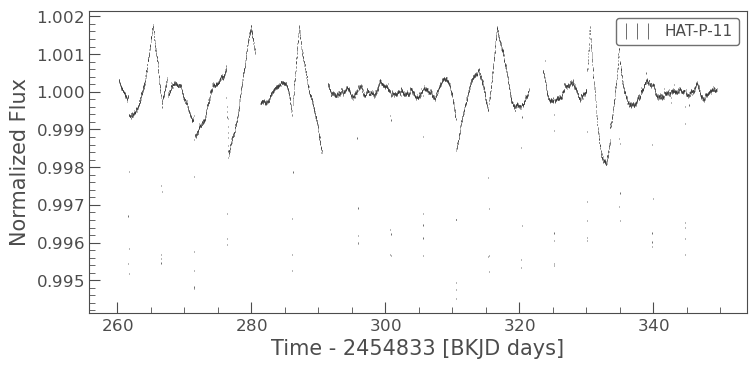

In [ ]:
flat.errorbar(label="HAT-P-11");

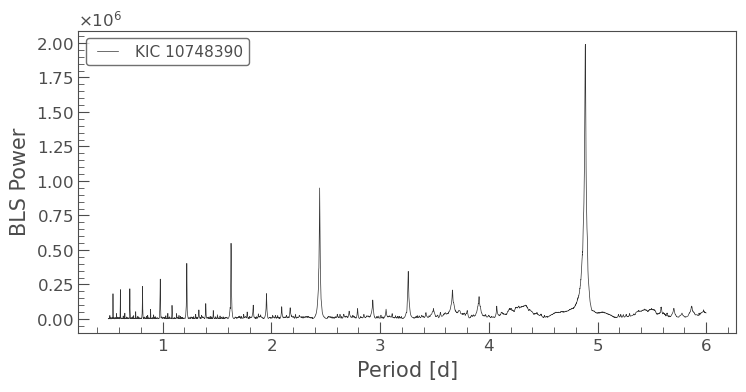

In [ ]:
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))
periodogram.plot();

In [ ]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 4.888 d


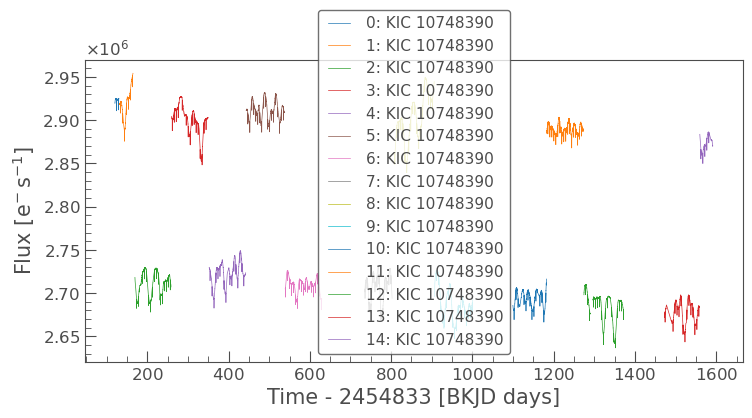

In [8]:
search_result = lk.search_lightcurve('HAT-P-11', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [9]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr010748390,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr010748390,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr010748390,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr010748390,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr010748390,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr010748390,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr010748390,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr010748390,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr010748390,0.0


In [10]:
lc2009 = lc_collection[:4]
lc2010 = lc_collection[4:7]
lc2011 = lc_collection[7:10]
lc2012 = lc_collection[10:13]

In [11]:
lc2009 = lc2009.stitch()
lc2010 = lc2010.stitch()
lc2011 = lc2011.stitch()
lc2012 = lc2012.stitch()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

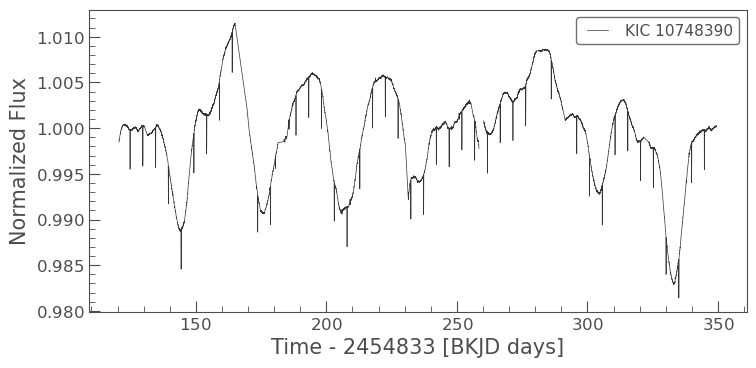

In [12]:
lc2009.plot()

In [13]:
flat2009, trend2009 = lc2009.flatten(window_length=31, polyorder=2,break_tolerance=5, return_trend=True)
flat2010, trend2010 = lc2010.flatten(window_length=31, polyorder=2,break_tolerance=5, return_trend=True)
flat2011, trend2011 = lc2011.flatten(window_length=31, polyorder=2,break_tolerance=5, return_trend=True)
flat2012, trend2012 = lc2012.flatten(window_length=11, polyorder=2,break_tolerance=5, return_trend=True)

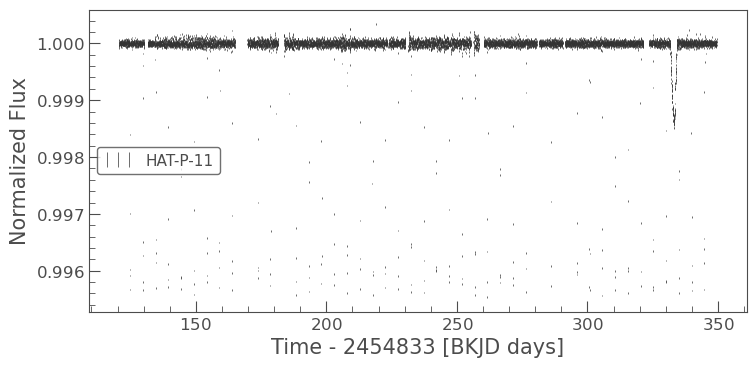

In [14]:
flat2009.errorbar(label="HAT-P-11");

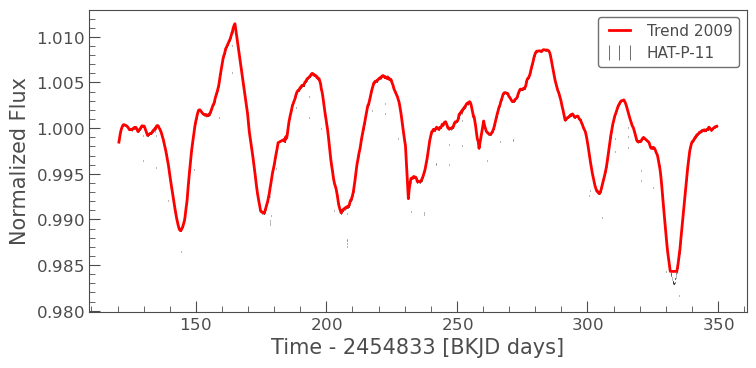

In [15]:
ax = lc2009.errorbar(label="HAT-P-11")                 
trend2009.plot(ax=ax, color='red', lw=2, label='Trend 2009'); 

In [16]:
#(flat2009-trend2009).errorbar(label="HAT-P-11");

In [17]:
periodogram2009 = flat2009.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))
periodogram2010 = flat2010.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))
periodogram2011 = flat2011.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))
periodogram2012 = flat2012.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))

`period` contains 192209 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.
`period` contains 281130 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.
`period` contains 257263 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.
`period` contains 271056 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


In [18]:
period2009 = periodogram2009.period_at_max_power
print('Best fit period: {:.3f}'.format(period2009))
period2010 = periodogram2010.period_at_max_power
print('Best fit period: {:.3f}'.format(period2010))
period2011 = periodogram2011.period_at_max_power
print('Best fit period: {:.3f}'.format(period2011))
period2012 = periodogram2012.period_at_max_power
print('Best fit period: {:.3f}'.format(period2012))

Best fit period: 4.888 d
Best fit period: 4.888 d
Best fit period: 4.888 d
Best fit period: 4.888 d


# Trying to fir the light curves with $\texttt{starry}$

In [2]:
starry.config.lazy = False
starry.config.quiet = True

In [3]:
star = starry.Primary(starry.Map(ydeg=0, udeg=2, amp=1.0), m=0.809, r=0.683)

In [4]:
star.map[1] = 0.646 # limb-darkening coefficient
star.map[2] = 0.048

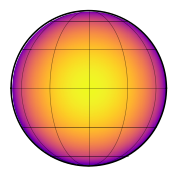

In [5]:
star.map.show()

In [7]:
planet2009 = starry.kepler.Secondary(
    starry.Map(udeg=2),  # the surface map
    m=7.0257708e-5,  # mass in solar masses
    r=0.039974684,  # radius in solar radii
    inc=88.99, # orbital inclination
    porb=period2009,  # orbital period in days
    w=-162.149,  # Argument of periastron (little omega)
    ecc=0.265,  # eccentricity
    Omega=106, # I think it's lambda in Morris 2017
    # t0=0.098,  # time of transit in days
)

planet2010 = starry.kepler.Secondary(
    starry.Map(udeg=2),  # the surface map
    m=7.0257708e-5,  # mass in solar masses
    r=0.039974684,  # radius in solar radii
    inc=88.99, # orbital inclination
    porb=period2010,  # orbital period in days
    w=-162.149,  # Argument of periastron (little omega)
    ecc=0.265,  # eccentricity
    Omega=106, # I think it's lambda in Morris 2017
    # t0=0.098,  # time of transit in days
)

planet2011 = starry.kepler.Secondary(
    starry.Map(udeg=2),  # the surface map
    m=7.0257708e-5,  # mass in solar masses
    r=0.039974684,  # radius in solar radii
    inc=88.99, # orbital inclination
    porb=period2011,  # orbital period in days
    w=-162.149,  # Argument of periastron (little omega)
    ecc=0.265,  # eccentricity
    Omega=106, # I think it's lambda in Morris 2017
    # t0=0.098,  # time of transit in days
)

planet2012 = starry.kepler.Secondary(
    starry.Map(udeg=2),  # the surface map
    m=7.0257708e-5,  # mass in solar masses
    r=0.039974684,  # radius in solar radii
    inc=88.99, # orbital inclination
    porb=period2012,  # orbital period in days
    w=-162.149,  # Argument of periastron (little omega)
    ecc=0.265,  # eccentricity
    Omega=106, # I think it's lambda in Morris 2017
    # t0=0.098,  # time of transit in days
)

NameError: name 'period2009' is not defined

In [24]:
system2009 = starry.System(star, planet2009)
system2010 = starry.System(star, planet2010)
system2011 = starry.System(star, planet2011)
system2012 = starry.System(star, planet2012)

time2009 = flat2009.fold(period=period2009, epoch_time=periodogram2009.transit_time_at_max_power)['time'].value
flux_system2009 = system2009.flux(time2009)

time2010 = flat2010.fold(period=period2010, epoch_time=periodogram2010.transit_time_at_max_power)['time'].value
flux_system2010 = system2010.flux(time2010)

time2011 = flat2011.fold(period=period2011, epoch_time=periodogram2011.transit_time_at_max_power)['time'].value
flux_system2011 = system2011.flux(time2011)

time2012 = flat2012.fold(period=period2012, epoch_time=periodogram2012.transit_time_at_max_power)['time'].value
flux_system2012 = system2012.flux(time2012)

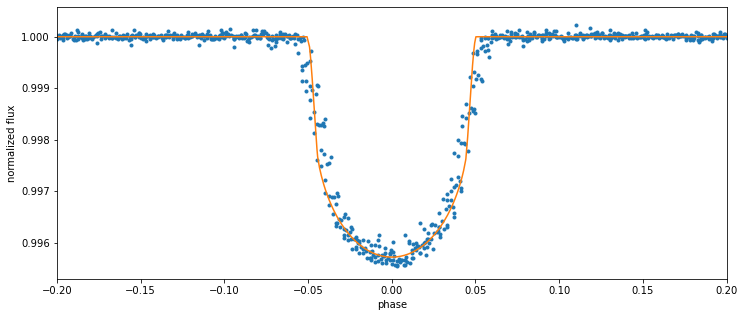

In [25]:
flux_star, flux_planet = system2009.flux(time2009, total=False)
plt.figure(figsize=(12, 5))
plt.plot((flat2009).fold(period=period2009, epoch_time=periodogram2009.transit_time_at_max_power)['time'].value,
    (flat2009).fold(period=period2009, epoch_time=periodogram2009.transit_time_at_max_power)['flux'],'.')
plt.xlim(-0.2,0.2)
plt.plot(time2009, flux_star)
plt.xlabel("phase")
plt.ylabel("normalized flux");
plt.show()

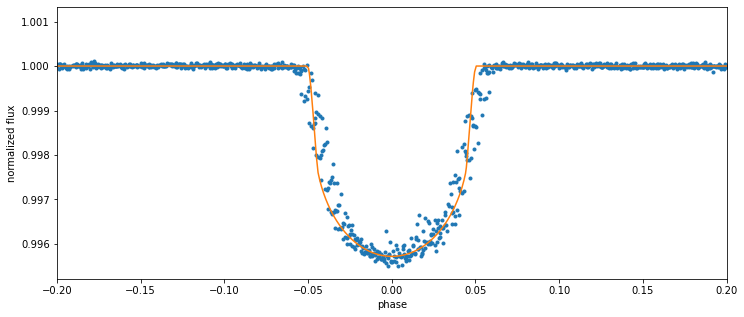

In [57]:
flux_star, flux_planet = system2010.flux(time2010, total=False)
plt.figure(figsize=(12, 5))
plt.plot(flat2010.fold(period=period2010, epoch_time=periodogram2010.transit_time_at_max_power)['time'].value,
    flat2010.fold(period=period2010, epoch_time=periodogram2010.transit_time_at_max_power)['flux'],'.')
plt.xlim(-0.2,0.2)
plt.plot(time2010, flux_star)
plt.xlabel("phase")
plt.ylabel("normalized flux");
plt.show()

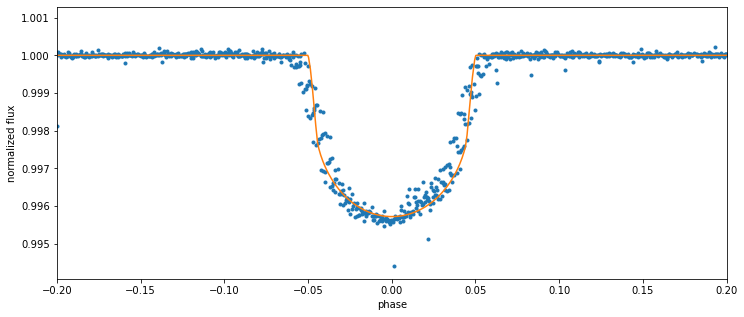

In [58]:
flux_star, flux_planet = system2011.flux(time2011, total=False)
plt.figure(figsize=(12, 5))
plt.plot(flat2011.fold(period=period2011, epoch_time=periodogram2011.transit_time_at_max_power)['time'].value,
    flat2011.fold(period=period2011, epoch_time=periodogram2011.transit_time_at_max_power)['flux'],'.')
plt.xlim(-0.2,0.2)
plt.plot(time2011, flux_star)
plt.xlabel("phase")
plt.ylabel("normalized flux");
plt.show()

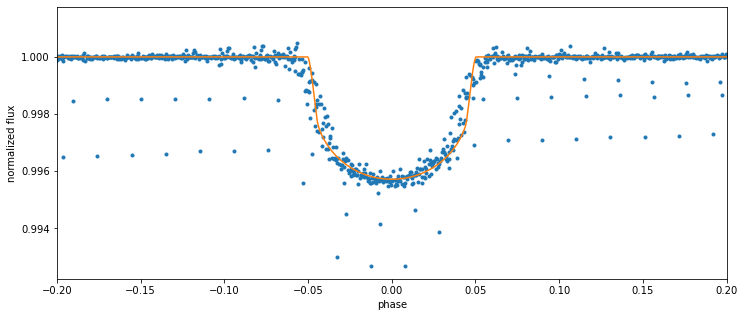

In [61]:
flux_star, flux_planet = system2012.flux(time2012, total=False)
plt.figure(figsize=(12, 5))
plt.plot(flat2012.fold(period=period2012, epoch_time=periodogram2012.transit_time_at_max_power)['time'].value,
    flat2012.fold(period=period2012, epoch_time=periodogram2012.transit_time_at_max_power)['flux'],'.')
plt.xlim(-0.2,0.2)
plt.plot(time2012, flux_star)
plt.xlabel("phase")
plt.ylabel("normalized flux");
plt.show()

In [6]:
search_result = lk.search_lightcurve('HAT-P-11', author='Kepler', cadence='short')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
# lc_collection.plot();

In [7]:
search_result.year

array([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011,
       2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013,
       2013, 2013, 2013, 2013])

In [8]:
lc1 = search_result[search_result.year == 2009].download_all()
lc3 = search_result[search_result.year == 2010].download_all()
lc4 = search_result[search_result.year == 2012].download_all()

In [9]:
lc1 = lc1.stitch()
lc3 = lc3.stitch()
lc4 = lc4.stitch()

In [10]:
lc1['time']

<Time object: scale='tdb' format='bkjd' value=[120.52859841 120.52927953 120.52996076 ... 349.50475254 349.50543371
 349.50611479]>

In [11]:
lc1['time'].format = 'iso'
lc3['time'].format = 'iso'
lc4['time'].format = 'iso'

In [12]:
lc1['time'].value[-1].split('-')[2].split(' ')[0]

'17'

In [13]:
mask3 = [i.split('-')[1]=='04' and i.split('-')[2].split(' ')[0]=='18' for i in lc3['time'].value]
mask1 = [i.split('-')[1]=='12' and i.split('-')[2].split(' ')[0]=='02' for i in lc1['time'].value]
mask2 = [i.split('-')[1]=='12' and i.split('-')[2].split(' ')[0]=='31' for i in lc1['time'].value]
mask4 = [i.split('-')[1]=='01' and i.split('-')[2].split(' ')[0]=='08' for i in lc4['time'].value]

In [14]:
len(mask2)

311826

In [16]:
lc2 = lc1[mask2]
lc1 = lc1[mask1]
lc3 = lc3[mask3]
lc4 = lc4[mask4]

In [17]:
lc1['time'].format = 'bkjd'
lc2['time'].format = 'bkjd'
lc3['time'].format = 'bkjd'
lc4['time'].format = 'bkjd'

In [18]:
lc1['time']

<Time object: scale='tdb' format='bkjd' value=[334.50024832 334.5009294  334.50161047 ... 335.49804959 335.49873077
 335.49941184]>

In [48]:
flat1 = lc1.flatten(window_length=301, polyorder=1,break_tolerance=5)
flat3 = lc3.flatten(window_length=301, polyorder=1,break_tolerance=5)
flat4 = lc4.flatten(window_length=301, polyorder=1,break_tolerance=5)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

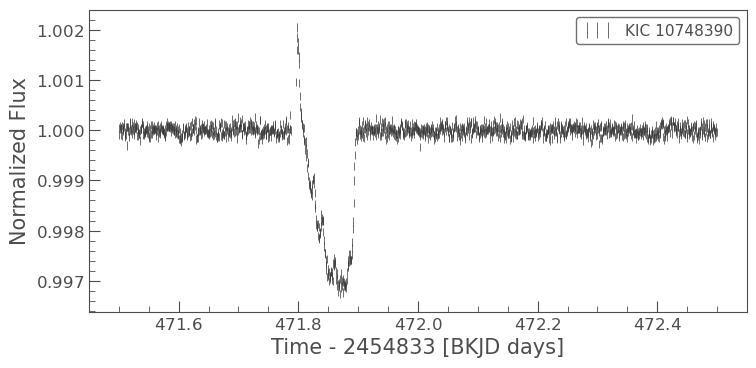

In [49]:
flat3.errorbar()

In [50]:
periodogram3 = flat3.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))
periodogram1 = flat1.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))
periodogram4 = flat4.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))
# periodogram2 = flat2.to_periodogram(method="bls", period=np.arange(0.5, 6, 0.001))

In [51]:
period3 = periodogram3.period_at_max_power
print('Best fit period: {:.3f}'.format(period3))

period1 = periodogram1.period_at_max_power
print('Best fit period: {:.3f}'.format(period1))

period4 = periodogram4.period_at_max_power
print('Best fit period: {:.3f}'.format(period4))


Best fit period: 0.667 d
Best fit period: 0.848 d
Best fit period: 0.887 d


In [63]:
planet3 = starry.kepler.Secondary(
    starry.Map(udeg=2),  # the surface map
    m=7.0257708e-5,  # mass in solar masses
    r=0.039974684,  # radius in solar radii
    inc=88.99, # orbital inclination
    porb=4.88,  # orbital period in days
    w=-162.149,  # Argument of periastron (little omega)
    ecc=0.265,  # eccentricity
    Omega=106, # I think it's lambda in Morris 2017
    # t0=0.098,  # time of transit in days
)

In [64]:
system3 = starry.System(star, planet3)
time3 = lc3.fold(period=period3, epoch_time=periodogram3.transit_time_at_max_power)['time'].value

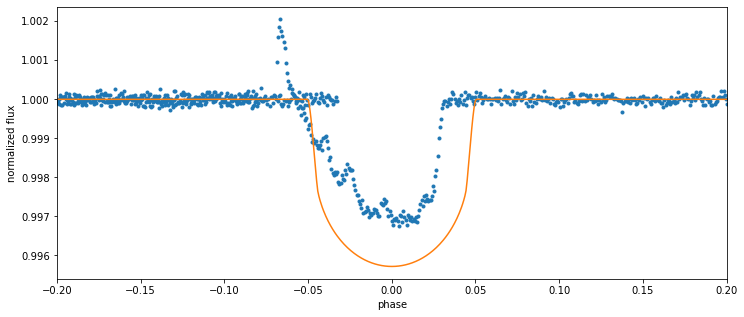

In [65]:
flux_star, flux_planet = system3.flux(time3, total=False)
plt.figure(figsize=(12, 5))
plt.plot(time3,
    flat3.fold(period=period3, epoch_time=periodogram3.transit_time_at_max_power)['flux'],'.')
plt.xlim(-0.2,0.2)
plt.plot(time3, flux_star)
plt.xlabel("phase")
plt.ylabel("normalized flux");
plt.show()

# Using $\texttt{exoplanet}$:

ERROR (theano.graph.opt): Optimization failure due to: constant_folding
ERROR (theano.graph.opt): node: Elemwise{mul,no_inplace}(TensorConstant{74.52695411934832}, TensorConstant{1.0}, TensorConstant{23.8925440..0000033 d2})
ERROR (theano.graph.opt): TRACEBACK:
ERROR (theano.graph.opt): Traceback (most recent call last):
  File "/opt/anaconda3/envs/pymc3_env/lib/python3.10/site-packages/theano/graph/opt.py", line 2017, in process_node
    replacements = lopt.transform(fgraph, node)
  File "/opt/anaconda3/envs/pymc3_env/lib/python3.10/site-packages/theano/graph/opt.py", line 1209, in transform
    return self.fn(*args, **kwargs)
  File "/opt/anaconda3/envs/pymc3_env/lib/python3.10/site-packages/theano/tensor/opt.py", line 7010, in constant_folding
    required = thunk()
  File "/opt/anaconda3/envs/pymc3_env/lib/python3.10/site-packages/theano/graph/op.py", line 476, in rval
    r = p(n, [x[0] for x in i], o)
  File "/opt/anaconda3/envs/pymc3_env/lib/python3.10/site-packages/theano/tenso

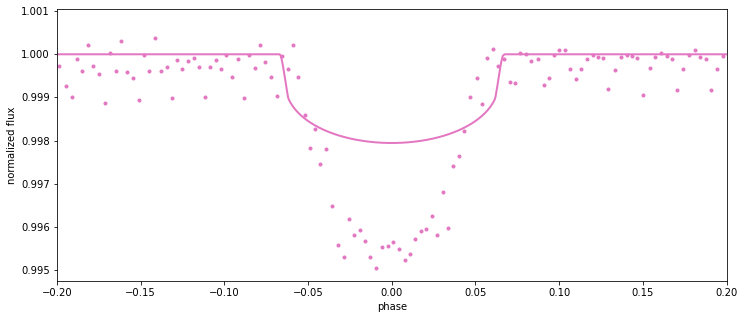

In [38]:
orbit = xo.orbits.KeplerianOrbit(period=period2012)
# Compute a limb-darkened light curve using starry
t = flat2012.fold(period=period2012, epoch_time=periodogram2012.transit_time_at_max_power)['time'].value
u = [0.646, 0.048]
light_curve = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.039974684, t=t)
    .eval()
)

plt.figure(figsize=(12,5))
plt.plot(t, light_curve+1, color="C6", lw=2)
plt.plot(flat2012.fold(period=period2012, epoch_time=periodogram2012.transit_time_at_max_power).bin(binsize=8)['time'].value,
        flat2012.fold(period=period2012, epoch_time=periodogram2012.transit_time_at_max_power).bin(binsize=8)['flux'],'.', color="C6", lw=2)
plt.xlim(-0.2,0.2)
plt.xlabel("phase")
plt.ylabel("normalized flux");
plt.show()

# Attempt number 2!

In [39]:
def Pos_ell(time):
	dist = a_bin
	ome = np.sqrt(mass/dist/dist/dist)
	phipp=np.zeros(len(time)+1)
	E=np.zeros(len(time))
	phipp=ome*time

	e = 0.265

	for j in range(len(time)): #M here is 2*pi*t/P = t*omega
		E[j] = compute_newton_raphson(10,time[j]*ome,e)

	rb0 = a_bin*(1-e)
	v_b = np.sqrt(mass/a_bin)
	wb0 = v_b*np.sqrt((1-e)/(1+e))

	g1 = a_bin/rb0*(1-np.cos(E))-1
	g2 = 1/ome*(E-np.sin(E))-time
	rb = g1*rb0+g2*wb0
	print(rb0)
	print(E)
	print(rb)

	xpp=np.zeros(len(time))
	ypp=np.zeros(len(time))


	for i in range(len(time)):
		xpp[i]=(rb[i]/2)*np.cos(phipp[i])
		#xpp[i]=a_bin*(e+np.cos(phipp[i]))/(1+e*np.cos(phipp[i]))
		ypp[i]=(rb[i]/2)*np.sin(phipp[i])
		
	return xpp,ypp
  
def compute_newton_raphson(N_it, M, e):
    # Compute Newton-Raphson method with given number of steps
    # The initial step is defined as E_0 = M + sgn(sin(l))*e*k following Danby (1988)

    k = 0.85

    this_ell = M

    #Define initial estimate
    if(np.sin(this_ell))<0:
    	old_E = this_ell - k*e
    else: 
    	old_E = this_ell + k*e

    #Perform Newton-Raphson estimate
    for j in range(N_it):
    	#Compute f(E) and f'(E)
	    f_E = old_E-e*np.sin(old_E)-this_ell #M-E+e*sin(E)
	    fP_E = 1.-e*np.cos(old_E)

	    #Update E
	    old_E =old_E-f_E/fP_E
  
    #Add to output
    new_E = old_E
    return new_E 


In [41]:
time = flat2012.fold(period=best_fit_period, epoch_time=periodogram.transit_time_at_max_power)['time'].value
mass = 8.68e-5  # mass in solar masses
a_bin = 14.64 # semi-major axis in solar radii
r=0.0585280878477306  # radius in solar radii
ecc = 0.265

NameError: name 'best_fit_period' is not defined

In [42]:
xpp, ypp = Pos_ell(time)

NameError: name 'time' is not defined

In [ ]:
E=np.zeros(len(time))

In [ ]:
for i,t in enumerate(time):
    ome = np.sqrt(mass/a_bin**3)
    E[i] = compute_newton_raphson(10,t*ome, ecc)

In [ ]:
P = a_bin * (np.cos(E) - ecc);
Q = a_bin * np.sin(E) * np.sqrt(1 - ecc**2);

In [ ]:
w = -162.149*np.pi/180  # Argument of periastron (little omega)
inc = 88.99*np.pi/180

In [ ]:
# rotate by argument of periapsis
xpp = np.cos(w) * P - np.sin(w) * Q;
ypp = np.sin(w) * P + np.cos(w) * Q;
# rotate by inclination
zpp = np.sin(i) * ypp;
ypp = np.cos(i) * ypp;

In [ ]:
xpp

array([-10.24475217, -10.24475214, -10.24475162, ..., -10.23996678,
       -10.23996629, -10.23996617])

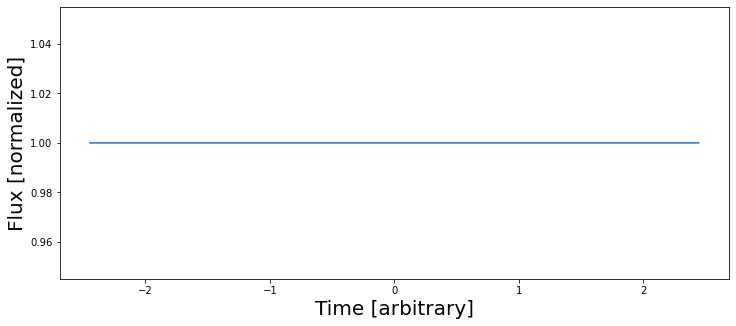

In [ ]:
map = starry.Map(ydeg=20)

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_planet2 = map.flux(xo=xpp, yo=ypp, ro=r, zo=zpp)
plt.plot(time, flux_planet2)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);
plt.show()

In [ ]:
t0 = 0.098

In [ ]:
xpp = a_bin*np.cos(2*np.pi*(time-t0))
ypp = a_bin*np.sin(2*np.pi*(time-t0))

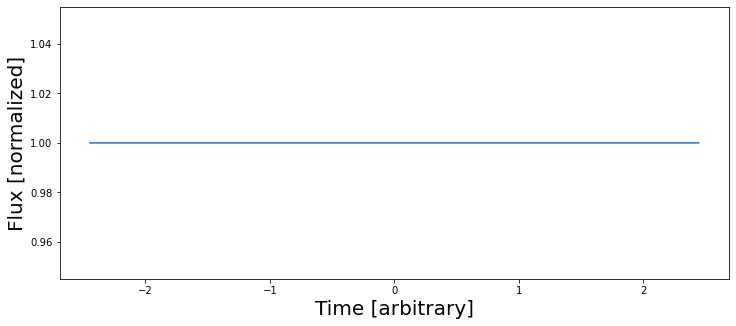

In [ ]:
map = starry.Map(ydeg=20)

# Compute and plot the light curve
plt.figure(figsize=(12, 5))
flux_planet3 = map.flux(xo=xpp, yo=ypp, ro=r, zo=1.0)
plt.plot(time, flux_planet3)
plt.xlabel("Time [arbitrary]", fontsize=20)
plt.ylabel("Flux [normalized]", fontsize=20);
plt.show()

# Using $\texttt{pyMC3}$

In [43]:
starry.config.quiet = True
starry.config.lazy = False
np.random.seed(1)

In [44]:
A = starry.Primary(starry.Map(ydeg=0, udeg=2, amp=1.0,), m=0.809, r=0.683, prot=1.0)
A.map[1] = 0.646
A.map[2] = 0.048

In [ ]:
# These are the parameters we're going to try to infer
log_amp_true = -3.0
offset_true = 30.0

b = starry.Secondary(
    starry.Map(ydeg=1, udeg=0, amp=10 ** log_amp_true),
    m=7.0257708e-5,  # mass in solar masses
    r=0.039974684,  # radius in solar radii
    inc=88.99, # orbital inclination
    porb=4.88, #period2009,  # orbital period in days
    w=-162.149,  # Argument of periastron (little omega)
    ecc=0.265,  # eccentricity
    Omega=106, # I think it's lambda in Morris 2017
)
b.map[1, 0] = 0.5
b.theta0 = 180.0 + offset_true

In [ ]:
sys = starry.System(A, b)

In [ ]:
t

NameError: name 't' is not defined

## generate a synthetic light curve:

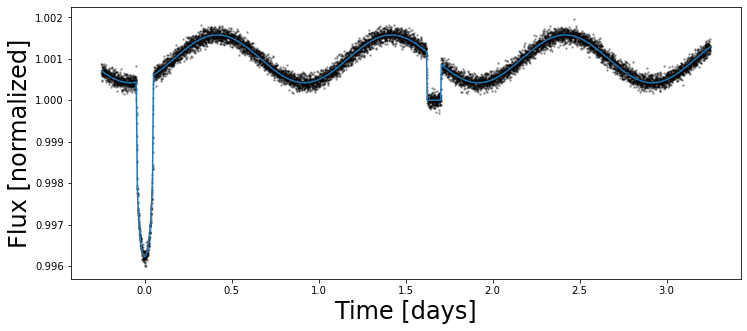

In [ ]:
t = np.linspace(-0.25, 3.25, 10000)
flux_true = sys.flux(t)
ferr = 1e-4
flux = flux_true + ferr * np.random.randn(len(t))
plt.figure(figsize=(12, 5))
plt.plot(t, flux, "k.", alpha=0.3, ms=3)
plt.plot(t, flux_true)
plt.xlabel("Time [days]", fontsize=24)
plt.ylabel("Flux [normalized]", fontsize=24);

In [ ]:
starry.config.lazy = True

with pm.Model() as model:

    # These are the variables we're solving for;
    # here we're placing wide Gaussian priors on them.
    offset = pm.Normal("offset", 0.0, 50.0, testval=0.11)
    log_amp = pm.Normal("log_amp", -4.0, 2.0, testval=-3.91)

    # Instantiate the star; all its parameters are assumed
    # to be known exactly
    A = starry.Primary(
        starry.Map(ydeg=0, udeg=2, amp=1.0), m=1.0, r=1.0, prot=1.0
    )
    A.map[1] = 0.646
    A.map[2] = 0.048

    # Instantiate the planet. Everything is fixed except for
    # its luminosity and the hot spot offset.
    b = starry.Secondary(
        starry.Map(ydeg=1, udeg=0, amp=10 ** log_amp_true),
        m=7.0257708e-5,  # mass in solar masses
        r=0.039974684,  # radius in solar radii
        inc=88.99, # orbital inclination
        porb=4.88, #period2009,  # orbital period in days
        w=-162.149,  # Argument of periastron (little omega)
        ecc=0.265,  # eccentricity
        Omega=106, # I think it's lambda in Morris 2017
    )
    # b.map.amp = 10 ** log_amp
    b.map[1, 0] = 0.5
    b._theta0 = 180.0 + offset

    # Instantiate the system as before
    sys = starry.System(A, b)

    # Our model for the flux
    flux_model = pm.Deterministic("flux_model", sys.flux(t))

    # This is how we tell `pymc3` about our observations;
    # we are assuming they are ampally distributed about
    # the true model. This line effectively defines our
    # likelihood function.
    pm.Normal("obs", flux_model, sd=ferr, observed=flux)

In [ ]:
with model:
    map_soln = pmx.optimize()

optimizing logp for variables: [log_amp, offset]


message: Desired error not necessarily achieved due to precision loss.
logp: -8703.092028376159 -> 19146.999421467484


In [ ]:
map_soln

{'offset': array(-0.46343823),
 'log_amp': array(-4.00000058),
 'flux_model': array([1.0007407 , 1.00073957, 1.00073843, ..., 1.00125703, 1.00125816,
        1.0012593 ])}

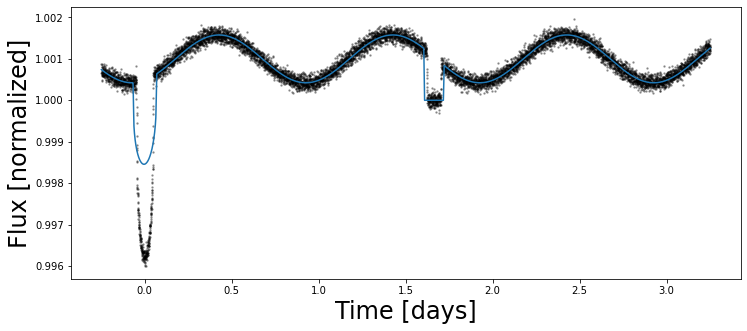

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(t, flux, "k.", alpha=0.3, ms=3)
plt.plot(t, map_soln['flux_model'])
plt.xlabel("Time [days]", fontsize=24)
plt.ylabel("Flux [normalized]", fontsize=24);